## Add-hoc analyze and visualization
### Source:  Kaggle.com

### 1.0--Customer needs description

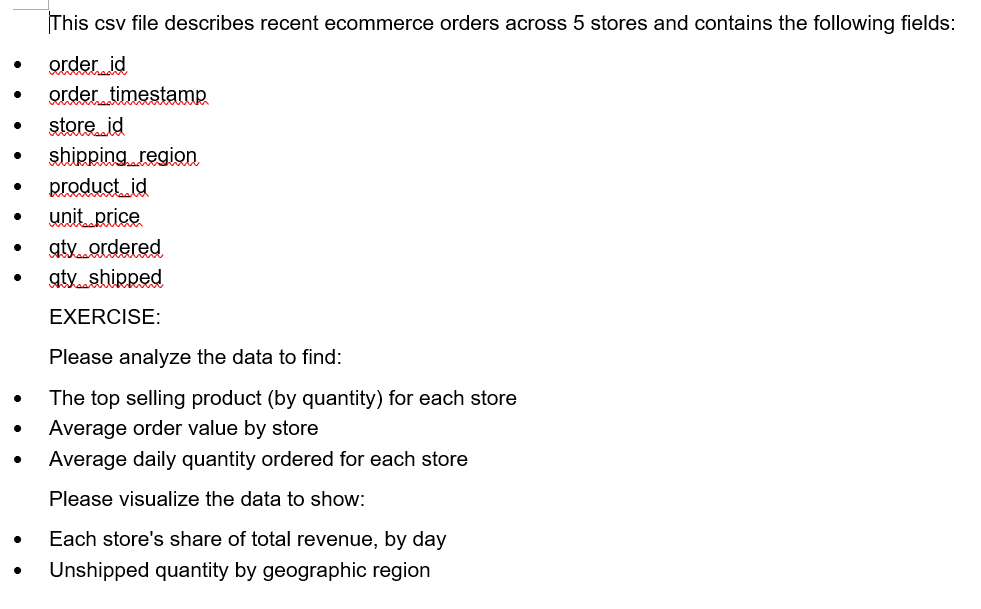

In [180]:
display_png(file="C:/Users/Xavier/Downloads/stadium exercise B/exercise B.png")

### 1.1 Explore the Data

In [241]:
library(plyr)
library(dplyr)
library(tidyr)
library(readr)
library(magrittr)
library(ggplot2)
library("IRdisplay")
library(chron)
library('scales')
library(reshape2)
library(ggmap)
library(tidyverse)
library(fiftystater)
library(viridis)
library(mapdata)
library(maptools)
library(maps)

In [184]:
snkr_data<-read.csv('C:/Users/Xavier/Downloads/stadium exercise B/sg_data_analyst_exercise_b.csv')

In [185]:
head(snkr_data,10)

order_id,order_timestamp,store_id,shipping_region,product_id,unit_price,qty_ordered,qty_shipped
100021034,2018-07-08 03:19:04,5,New Jersey,9882,175.0,1,1
100337701,2018-07-09 11:22:43,5,California,15947,40.0,1,1
100406337,2018-07-08 13:10:50,5,Tennessee,17662,269.0,1,1
100442461,2018-07-05 15:19:55,1,New York,9949,285.0,1,1
100447356,2018-07-08 16:14:11,3,Florida,3434,160.0,1,1
100457085,2018-07-11 12:37:18,5,New York,9257,495.0,1,1
100457085,2018-07-11 12:37:18,5,New York,17908,125.0,1,1
100465789,2018-07-05 00:04:57,2,Arizona,14815,394.2,1,1
100465790,2018-07-05 00:05:06,2,Nevada,14246,120.0,1,1
100465826,2018-07-05 00:41:20,2,California,10167,145.6,1,1


In [186]:
summary(snkr_data)

    order_id                    order_timestamp    store_id    
 Min.   :100021034   2018-07-06 14:05:57:  8    Min.   :1.000  
 1st Qu.:100467986   2018-07-11 18:27:29:  5    1st Qu.:2.000  
 Median :100470226   2018-07-06 03:37:10:  4    Median :3.000  
 Mean   :107433338   2018-07-06 12:30:59:  4    Mean   :3.025  
 3rd Qu.:100472533   2018-07-07 00:56:07:  4    3rd Qu.:5.000  
 Max.   :200009412   2018-07-06 08:41:04:  3    Max.   :5.000  
                     (Other)            :801                   
   shipping_region   product_id      unit_price      qty_ordered   
 California:151    Min.   :   23   Min.   :   0.0   Min.   :1.000  
 New York  :111    1st Qu.: 8526   1st Qu.: 115.0   1st Qu.:1.000  
 Florida   : 64    Median :12834   Median : 185.0   Median :1.000  
 New Jersey: 61    Mean   :11757   Mean   : 247.8   Mean   :1.004  
 Texas     : 46    3rd Qu.:16077   3rd Qu.: 299.0   3rd Qu.:1.000  
 Virginia  : 29    Max.   :18141   Max.   :2150.0   Max.   :2.000  
 (Other)   :

### 2.1 Top Selling Product for Each Store

In [187]:
#aggregate(y~x,data,func,func argument)---y means responsible variable,x means grouping parameters,func...)
seller_data<-aggregate(qty_ordered~product_id+store_id, snkr_data, 'sum')
seller_data[1:10,]
# fist group various stores, and then group various products,finally sum the quantity of orders

product_id,store_id,qty_ordered
38,1,1
104,1,1
132,1,1
174,1,1
429,1,1
440,1,1
442,1,1
1180,1,1
1260,1,1
1522,1,1


In [188]:
order_seller<-seller_data[order(-seller_data$qty_ordered),]
# order the above result by qty_ordered DESC
result<-order_seller[which(order_seller$store_id==5),][1,]
# filter with store_id condition

In [189]:
result

,product_id,store_id,qty_ordered
656,18030,5,7


#### topseller function can request any store's best seller, whether a single store or some stores. It doesn't matter whether it is starting from store_id 1, and out of range request is restricted.

In [190]:
topseller<-function(i,j){
    if (i>j) {a<-min(c(i,j))
             b<-max(c(i,j))
             i<-a
             j<-b}
    
    if (i>length(unique(snkr_data$store_id)))
    {
        return('request not available')}
    else
    {
        if (j>length(unique(snkr_data$store_id)))
            {j<-5}
            seller_data<-aggregate(qty_ordered~product_id+store_id, snkr_data, sum)
    order_seller<-seller_data[order(-seller_data$qty_ordered),]
    mylist<-c(i:j)
        output<-order_seller[1:(j-i+1),]
    for (i in i:j) {
        x=match(i,mylist)
output[x,]<-order_seller[which(order_seller$store_id==i),][1,]
        }
         return(output)}
    }

In [191]:
topseller(6,10)

[1] "request not available"

In [192]:
topseller(2,2)

,product_id,store_id,qty_ordered
93,17221,2,9


In [224]:
topseller(1,5)

,product_id,store_id,qty_ordered
93,18030,1,11
266,17221,2,9
244,14973,3,6
654,14327,4,3
368,18030,5,7


In [194]:
topseller(2,10)

,product_id,store_id,qty_ordered
93,17221,2,9
268,14973,3,6
246,14327,4,3
656,18030,5,7


In [195]:
topseller(5,2)

,product_id,store_id,qty_ordered
93,17221,2,9
268,14973,3,6
246,14327,4,3
656,18030,5,7


In [196]:
topseller(10,2)

,product_id,store_id,qty_ordered
93,17221,2,9
268,14973,3,6
246,14327,4,3
656,18030,5,7


### 2.2 Average Order Value for Each Store

In [197]:
#order_value is the product of quantity and unit price
snkr_data$order_value<-with(snkr_data,unit_price*qty_ordered)
t=ncol(snkr_data)
snkr_data<-snkr_data[c(1:(t-2),t,(t-1))]

In [198]:
snkr_data[1:10,]

order_id,order_timestamp,store_id,shipping_region,product_id,unit_price,qty_ordered,order_value,qty_shipped
100021034,2018-07-08 03:19:04,5,New Jersey,9882,175.0,1,175.0,1
100337701,2018-07-09 11:22:43,5,California,15947,40.0,1,40.0,1
100406337,2018-07-08 13:10:50,5,Tennessee,17662,269.0,1,269.0,1
100442461,2018-07-05 15:19:55,1,New York,9949,285.0,1,285.0,1
100447356,2018-07-08 16:14:11,3,Florida,3434,160.0,1,160.0,1
100457085,2018-07-11 12:37:18,5,New York,9257,495.0,1,495.0,1
100457085,2018-07-11 12:37:18,5,New York,17908,125.0,1,125.0,1
100465789,2018-07-05 00:04:57,2,Arizona,14815,394.2,1,394.2,1
100465790,2018-07-05 00:05:06,2,Nevada,14246,120.0,1,120.0,1
100465826,2018-07-05 00:41:20,2,California,10167,145.6,1,145.6,1


In [199]:
length(snkr_data$order_id);length(unique(snkr_data$order_id))
# Now, we know that there are some duplicated order_id, so I cannot simply use aggregate 'mean' function

[1] 829

[1] 761

In [200]:
avg_order_value<-function(i,j){
    n=length(unique(snkr_data$store_id))
    output<-data.frame('store_id'=rep(1,n),"avg_order_value"=rep(0,n))
    output<-output[1:(j-i+1),]
    mylist<-c(i:j)
    for (i in i:j){ 
        x=match(i,mylist)
subset<-snkr_data[snkr_data$store_id==i,]
len=length(unique(subset$order_id))
sum=sum(subset$order_value)
    avg=floor(sum/len)
        output[x,1:ncol(output)]=c(i,avg) 
    }
    return(output)
    }

In [201]:
avg_order_value(2,5)

store_id,avg_order_value
2,204
3,267
4,234
5,288


### 2.3 Average Daily Quantity Ordered

In [202]:
class(snkr_data$order_timestamp)

[1] "factor"

In [203]:
snkr_data$order_date<-as.Date(snkr_data$order_timestamp,'%Y-%m-%d')

In [204]:
snkr_data[1:10,]

order_id,order_timestamp,store_id,shipping_region,product_id,unit_price,qty_ordered,order_value,qty_shipped,order_date
100021034,2018-07-08 03:19:04,5,New Jersey,9882,175.0,1,175.0,1,2018-07-08
100337701,2018-07-09 11:22:43,5,California,15947,40.0,1,40.0,1,2018-07-09
100406337,2018-07-08 13:10:50,5,Tennessee,17662,269.0,1,269.0,1,2018-07-08
100442461,2018-07-05 15:19:55,1,New York,9949,285.0,1,285.0,1,2018-07-05
100447356,2018-07-08 16:14:11,3,Florida,3434,160.0,1,160.0,1,2018-07-08
100457085,2018-07-11 12:37:18,5,New York,9257,495.0,1,495.0,1,2018-07-11
100457085,2018-07-11 12:37:18,5,New York,17908,125.0,1,125.0,1,2018-07-11
100465789,2018-07-05 00:04:57,2,Arizona,14815,394.2,1,394.2,1,2018-07-05
100465790,2018-07-05 00:05:06,2,Nevada,14246,120.0,1,120.0,1,2018-07-05
100465826,2018-07-05 00:41:20,2,California,10167,145.6,1,145.6,1,2018-07-05


In [205]:
snkr_data$order_date<-as.factor(snkr_data$order_date)
str(snkr_data$order_date)

 Factor w/ 7 levels "2018-07-05","2018-07-06",..: 4 5 4 1 4 7 7 1 1 1 ...


In [206]:
daily_order<-aggregate(qty_ordered~store_id+order_date,snkr_data,FUN='sum')
daily_order[order(daily_order$store_id,daily_order$order_date),]

,store_id,order_date,qty_ordered
1,1,2018-07-05,23
5,1,2018-07-06,20
10,1,2018-07-07,18
18,1,2018-07-09,17
22,1,2018-07-10,29
26,1,2018-07-11,15
2,2,2018-07-05,42
6,2,2018-07-06,46
14,2,2018-07-08,52
19,2,2018-07-09,38


In [207]:
avg_daily_qty<-function(){
    output<-aggregate(order_value~store_id, snkr_data, mean)
    output$avg_daily_qty_round<-1
    daily<-aggregate(qty_ordered~store_id+order_date,snkr_data,FUN='sum')
    i=length(unique(snkr_data$store_id))
    for (i in 1:i){   
subtest<-snkr_data[daily$store_id==i,]
len=length(unique(subtest$order_date))
sum=sum(subtest$qty_ordered)
    avg=floor(sum/len)
    avg2=round(sum/len,digits=2)
        output[i,(ncol(output)-1):ncol(output)]=c(avg,avg2)     
    }
    names(output)[names(output) == "order_value"] <- "avg_daily_qty_floor"
    return(output) 
    }

In [208]:
avg_daily_qty()

store_id,avg_daily_qty_floor,avg_daily_qty_round
1,23,23.71
2,24,24.00
3,23,23.86
4,23,23.71
5,23,23.57


### 3.1 Visualization--Each Store's Revenue Share

In [209]:
str(snkr_data)

'data.frame':	829 obs. of  10 variables:
 $ order_id       : int  100021034 100337701 100406337 100442461 100447356 100457085 100457085 100465789 100465790 100465826 ...
 $ order_timestamp: Factor w/ 761 levels "2018-07-05 00:04:57",..: 327 449 360 53 384 678 678 1 3 5 ...
 $ store_id       : int  5 5 5 1 3 5 5 2 2 2 ...
 $ shipping_region: Factor w/ 48 levels "Alabama","Arizona",..: 30 6 42 32 11 32 32 2 28 6 ...
 $ product_id     : int  9882 15947 17662 9949 3434 9257 17908 14815 14246 10167 ...
 $ unit_price     : num  175 40 269 285 160 ...
 $ qty_ordered    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_value    : num  175 40 269 285 160 ...
 $ qty_shipped    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_date     : Factor w/ 7 levels "2018-07-05","2018-07-06",..: 4 5 4 1 4 7 7 1 1 1 ...


In [210]:
snkr_data$store_id<-as.factor(snkr_data$store_id)

In [211]:
v1<-aggregate(order_value~order_date+store_id,snkr_data,sum)
v1<-v1[order(v1$order_date,v1$store_id),]
names(v1)[names(v1) == "order_value"] <- "revenue"

v2<-aggregate(order_value~order_date,snkr_data,sum)
names(v2)[names(v2) == "order_value"] <- "total_revenue"

v3<-merge(v1,v2, by='order_date', all.x=TRUE)

v3$rev_percent<-with(v3,round((100*revenue/total_revenue),digits=2))
v3

order_date,store_id,revenue,total_revenue,rev_percent
2018-07-05,1,7116.00,22111.75,32.18
2018-07-05,2,9397.75,22111.75,42.50
2018-07-05,3,3905.00,22111.75,17.66
2018-07-05,4,1693.00,22111.75,7.66
2018-07-06,1,9170.00,44630.30,20.55
2018-07-06,2,9106.30,44630.30,20.40
2018-07-06,3,5579.00,44630.30,12.50
2018-07-06,4,11977.00,44630.30,26.84
2018-07-06,5,8798.00,44630.30,19.71
2018-07-07,1,4565.00,18535.00,24.63


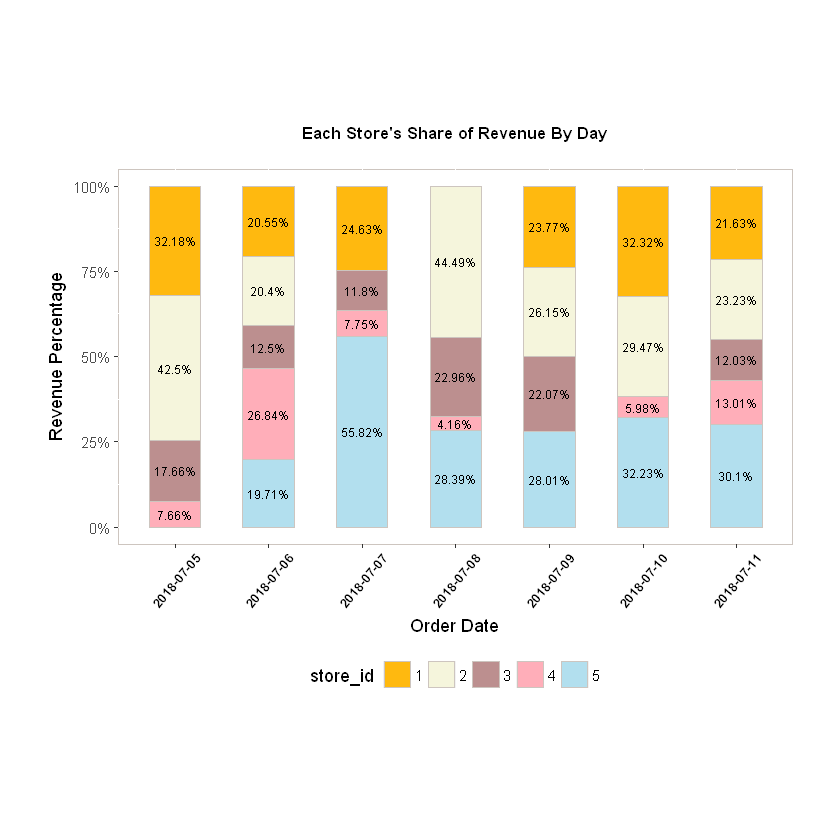

In [225]:
v3 <- ddply(v3, .(order_date),transform, pos = 100-cumsum(rev_percent) + (0.5 * rev_percent))
#to display correct position on the stacked bars, I should recode the position
colorfill=c('darkgoldenrod1','beige','rosybrown','lightpink1','lightblue2')

p1<-ggplot(v3,aes(y = rev_percent, x = order_date, fill = store_id)) + 
# fill is the bar
geom_bar(stat="identity",width=0.55,color="seashell3") + 
geom_text(data=v3, aes(x = order_date, y =pos,label = paste0(rev_percent,'%')), size=2.5) +
theme(legend.position="bottom", legend.direction="horizontal") +
scale_y_continuous(labels = dollar_format(suffix = "%", prefix = "")) +
ggtitle("Each Store's Share of Revenue By Day")+
theme(plot.title = element_text(size=10,hjust=0.5,vjust=6,face="bold"),
      panel.background = element_rect(fill = 'white', colour = 'seashell3'),
     plot.margin = unit(c(3, 1, 3, 1), "cm"),
      axis.text.x=element_text(angle=50, size=8, vjust=0.5,face='bold',color='black'))+
scale_fill_manual(values=colorfill)+
labs(x="Order Date", y="Revenue Percentage") 


p1

### 3.2 Visualization--Geomap for Unshipped Quantity

In [213]:
snkr_data[1:10,]

order_id,order_timestamp,store_id,shipping_region,product_id,unit_price,qty_ordered,order_value,qty_shipped,order_date
100021034,2018-07-08 03:19:04,5,New Jersey,9882,175.0,1,175.0,1,2018-07-08
100337701,2018-07-09 11:22:43,5,California,15947,40.0,1,40.0,1,2018-07-09
100406337,2018-07-08 13:10:50,5,Tennessee,17662,269.0,1,269.0,1,2018-07-08
100442461,2018-07-05 15:19:55,1,New York,9949,285.0,1,285.0,1,2018-07-05
100447356,2018-07-08 16:14:11,3,Florida,3434,160.0,1,160.0,1,2018-07-08
100457085,2018-07-11 12:37:18,5,New York,9257,495.0,1,495.0,1,2018-07-11
100457085,2018-07-11 12:37:18,5,New York,17908,125.0,1,125.0,1,2018-07-11
100465789,2018-07-05 00:04:57,2,Arizona,14815,394.2,1,394.2,1,2018-07-05
100465790,2018-07-05 00:05:06,2,Nevada,14246,120.0,1,120.0,1,2018-07-05
100465826,2018-07-05 00:41:20,2,California,10167,145.6,1,145.6,1,2018-07-05


In [214]:
snkr_data$unshipped_qty<-with(snkr_data,qty_ordered-qty_shipped)

In [215]:
str(snkr_data)

'data.frame':	829 obs. of  11 variables:
 $ order_id       : int  100021034 100337701 100406337 100442461 100447356 100457085 100457085 100465789 100465790 100465826 ...
 $ order_timestamp: Factor w/ 761 levels "2018-07-05 00:04:57",..: 327 449 360 53 384 678 678 1 3 5 ...
 $ store_id       : Factor w/ 5 levels "1","2","3","4",..: 5 5 5 1 3 5 5 2 2 2 ...
 $ shipping_region: Factor w/ 48 levels "Alabama","Arizona",..: 30 6 42 32 11 32 32 2 28 6 ...
 $ product_id     : int  9882 15947 17662 9949 3434 9257 17908 14815 14246 10167 ...
 $ unit_price     : num  175 40 269 285 160 ...
 $ qty_ordered    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_value    : num  175 40 269 285 160 ...
 $ qty_shipped    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_date     : Factor w/ 7 levels "2018-07-05","2018-07-06",..: 4 5 4 1 4 7 7 1 1 1 ...
 $ unshipped_qty  : int  0 0 0 0 0 0 0 0 0 0 ...


In [230]:
nrow(snkr_data)
snkr_data<-snkr_data[snkr_data$shipping_region!='Armed Forces Europe'&snkr_data$shipping_region!='Armed Forces Pacific',]
snkr_data<-snkr_data[snkr_data$shipping_region!='Puerto Rico',]
nrow(snkr_data)
#remove two Armed Forces outside the country, as they cannot be shown in the map

[1] 825

[1] 825

In [233]:
unship_data<-aggregate(unshipped_qty~shipping_region,snkr_data,FUN='sum')

In [235]:
unship_data[1:5,];nrow(unship_data)

shipping_region,unshipped_qty
Alabama,0
Arizona,0
Arkansas,0
California,2
Colorado,0


[1] 45

In [218]:
summary(unship_data)

    shipping_region unshipped_qty   
 Alabama    : 1     Min.   :0.0000  
 Arizona    : 1     1st Qu.:0.0000  
 Arkansas   : 1     Median :0.0000  
 California : 1     Mean   :0.5217  
 Colorado   : 1     3rd Qu.:0.0000  
 Connecticut: 1     Max.   :8.0000  
 (Other)    :40                     

In [236]:
unship_data$state<-str_to_lower(unship_data$shipping_region)

In [297]:
unship_data[1:5,];nrow(unship_data)

shipping_region,unshipped_qty,state
Alabama,0,alabama
Arizona,0,arizona
Arkansas,0,arkansas
California,2,california
Colorado,0,colorado


[1] 45

In [243]:
head(us,6)

long,lat,group,order,region,subregion
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


In [269]:
gglabel=fifty_states %>%
      group_by(id) %>%
      summarise(lat = mean(c(max(lat), min(lat))),
                long = mean(c(max(long), min(long)))) 

In [271]:
gglabel[1:5,];nrow(gglabel)

id,lat,long
alabama,32.62482,-86.68348
alaska,27.13026,-118.14530
arizona,34.16978,-111.93369
arkansas,34.75148,-92.13137
california,37.26899,-119.25893


[1] 51

In [279]:
gglabel$state_abb<-state.abb[match(gglabel$id,str_to_lower(state.name))]

In [298]:
gglabel[1:5,];nrow(gglabel)

id,lat,long,state_abb
alabama,32.62482,-86.68348,AL
alaska,27.13026,-118.14530,AK
arizona,34.16978,-111.93369,AZ
arkansas,34.75148,-92.13137,AR
california,37.26899,-119.25893,CA


[1] 51

In [311]:
gglabel[gglabel$state_abb=='NY',]

id,lat,long,state_abb
NA,NA,NA,NA
new york,42.75607,-75.81661,NY


Warning message:
"Ignoring unknown aesthetics: x, y"Warning message:
"Removed 1 rows containing missing values (geom_text)."

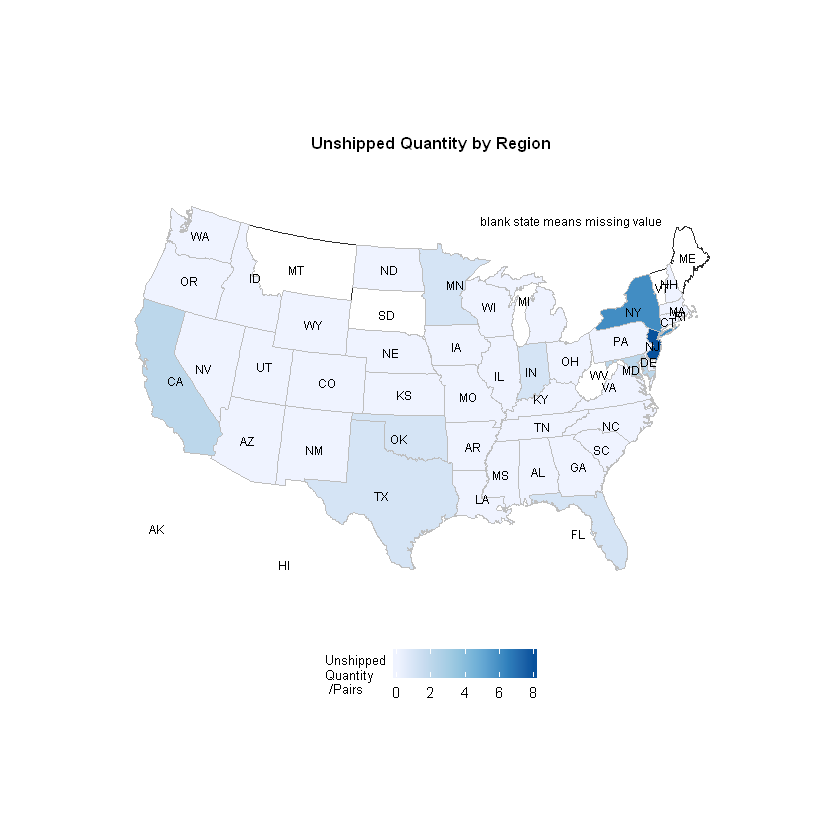

In [328]:
gg <- ggplot()+
    geom_map(data=us, map=us,
                    aes(long,lat,map_id=region),
                    color="#2b2b2b", fill=NA, size=0.5)+
    geom_map(data=unship_data, map=us,
                    aes(fill=unshipped_qty,
                        map_id=state),
                    color="grey", size=0.15)+
    geom_text(data = gglabel,aes(x = long, y = lat, label = state_abb ),color='black',size=2.5) +
     coord_map("polyconic")+
    ggtitle("Unshipped Quantity by Region")+
    scale_fill_distiller(palette = 'Blues', direction = 1,name = "Unshipped\nQuantity\n /Pairs")+
#distiller is for continuous vars, fill is the area, color is the line
    scale_x_continuous(breaks = NULL) +
      scale_y_continuous(breaks = NULL) +
      labs(x = "", y = "")+
    theme(plot.title = element_text(size=10,hjust=0.5,vjust=0,face='bold'),
      panel.background = element_rect(fill = 'white', color = 'white'),
        legend.position="bottom",legend.title=element_text(size=8))+
    annotate("text", x = -80, y = 50, label = "blank state means missing value",size=2.5)


gg

### 4 Refer links
http://t-redactyl.io/blog/2016/01/creating-plots-in-r-using-ggplot2-part-3-bar-plots.html

http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization

http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

https://stackoverflow.com/questions/48832201/plot-a-numerical-values-in-united-states-map-based-on-abbreviated-state-names

https://ggplot2.tidyverse.org/reference/scale_brewer.html

In [ ]:
snkr_data<-subset(snkr_data,select=-c(X))

In [ ]:
snkr_data<-read.csv('D:/BaiduNetdiskDownload/snkr_data1016.csv')

In [ ]:
write.csv(map_data,file='D:/BaiduNetdiskDownload/map_data1016.csv')

In [ ]:
write.csv(snkr_data,file='D:/BaiduNetdiskDownload/snkr_data1016.csv')